# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    cities.append(city)
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1500

In [3]:
cities[:20]

['apartado',
 'namatanai',
 'narrabri',
 'hami',
 'busselton',
 'norman wells',
 'cheltenham',
 'saint george',
 'padang',
 'san juan',
 'payyannur',
 'rikitea',
 'berdigestyakh',
 'rikitea',
 'mys shmidta',
 'eyemouth',
 'bandar-e anzali',
 'nizhniy odes',
 'hamilton',
 'saldanha']

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = 'a1b1e1ca351c69bca2cbaef32757bbcd'

units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a1b1e1ca351c69bca2cbaef32757bbcd&units=metric&q='

In [6]:
# Loop through the list of cities and perform a request for data on each

city_list = []
countries = []
dates = []
lats = []
lngs = []
clouds = []
hums = []
mxtemps = []
winds = []

counter = 1

for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        city_list.append(response['name'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])    
        hums.append(response['main']['humidity'])
        mxtemps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        
        print(f"Processing Record #: {counter} | city: {city}")
        counter += 1 
    except:
        print("City not found. Skipping city.")
        continue

Processing Record #: 1 | city: arraial do cabo
Processing Record #: 2 | city: busselton
Processing Record #: 3 | city: kapaa
Processing Record #: 4 | city: banjar
Processing Record #: 5 | city: santa vitoria do palmar
Processing Record #: 6 | city: saskylakh
Processing Record #: 7 | city: upernavik
Processing Record #: 8 | city: souillac
Processing Record #: 9 | city: prince rupert
Processing Record #: 10 | city: chuy
Processing Record #: 11 | city: hermanus
City not found. Skipping city.
Processing Record #: 12 | city: khatanga
Processing Record #: 13 | city: san quintin
City not found. Skipping city.
Processing Record #: 14 | city: atar
Processing Record #: 15 | city: luderitz
Processing Record #: 16 | city: rikitea
Processing Record #: 17 | city: puerto leguizamo
Processing Record #: 18 | city: albany
Processing Record #: 19 | city: east london
Processing Record #: 20 | city: port alfred
Processing Record #: 21 | city: anamur
Processing Record #: 22 | city: carnarvon
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
print(f"City: {len(city_list)}")
print(f"Cloudiness: {len(clouds)}")
print(f"Countries: {len(countries)}")
print(f"Dates: {len(dates)}")
print(f"Humidity: {len(hums)}")
print(f"Latitude: {len(lats)}")
print(f"Longitude: {len(lngs)}")
print(f"Max Temp: {len(mxtemps)}")
print(f"Wind Speed: {len(winds)}")

City: 559
Cloudiness: 559
Countries: 559
Dates: 559
Humidity: 559
Latitude: 559
Longitude: 559
Max Temp: 559
Wind Speed: 559


In [9]:
# Create a data frame from cities.
weather_dict = {
    "City": city_list,
    "Cloudiness": clouds,
    "Country": countries,
    "Date": dates,
    "Humidity": hums,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temp": mxtemps,
    "Wind Speed": winds
}
weather_data = pd.DataFrame(weather_dict)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 9 columns):
City          559 non-null object
Cloudiness    559 non-null int64
Country       559 non-null object
Date          559 non-null int64
Humidity      559 non-null int64
Latitude      559 non-null float64
Longitude     559 non-null float64
Max Temp      559 non-null float64
Wind Speed    559 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.4+ KB


In [4]:
# No code here (output provided).

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [10]:
# Display the dataframe.
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Arraial do Cabo,0,BR,1554566400,74,-22.97,-42.02,32.00,6.20
1,Busselton,76,AU,1554569410,53,-33.64,115.35,12.78,4.66
2,Kapaa,1,US,1554566160,88,22.08,-159.32,19.00,3.10
3,Banjar,76,ID,1554569453,96,-7.37,108.54,21.85,1.11
4,Santa Vitoria do Palmar,80,BR,1554569333,82,-33.52,-53.37,21.50,4.36


In [18]:
weather_data.to_csv(output_data_file, index_label="city_list")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

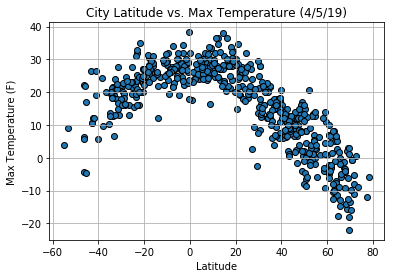

In [19]:
#### Build a scatter plot for Latitude vs. Temperature Plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (4/5/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

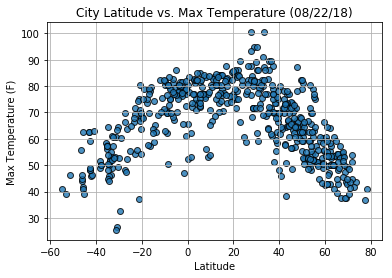

In [6]:
# No code here (output provided).

#### Latitude vs. Humidity Plot

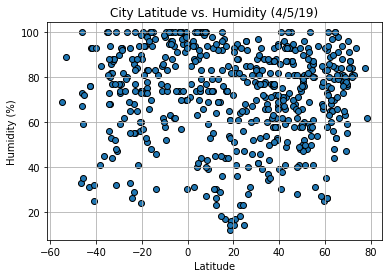

In [20]:
# Build a scatter plot for Latitude vs. Humidity Plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (4/5/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Humidity_Plot.png")

# Show plot
plt.show()

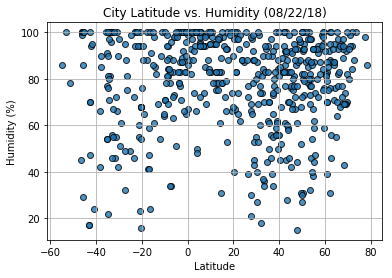

In [7]:
# No code here (output provided).

#### Latitude vs. Cloudiness Plot

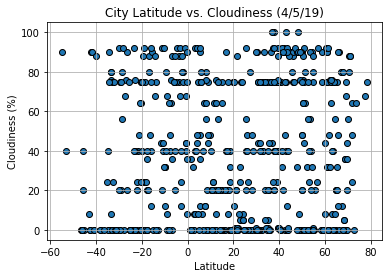

In [21]:
# Build a scatter plot for Latitude vs. Cloudiness Plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (4/5/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Cloudiness_Plot.png")

# Show plot
plt.show()

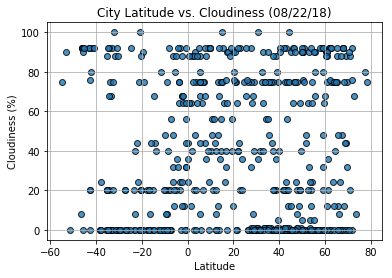

In [8]:
# No code here (output provided).

#### Latitude vs. Wind Speed Plot

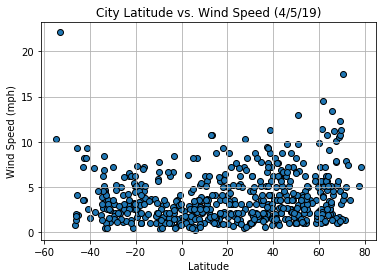

In [22]:
# Build a scatter plot for Latitude vs. Wind Speed Plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (4/5/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Wind_Speed_Plot.png")

# Show plot
plt.show()

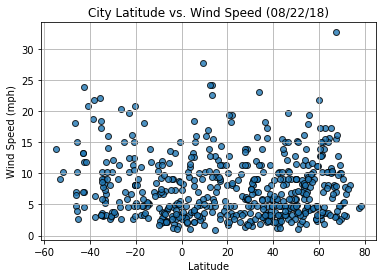

In [9]:
# No code here (output provided).

# Written description of three observable trends based on the data.
Latitude vs. Temperature: Latitude has an inverse relationship with temperature. Higher temperatures occur near regions of lower latitudes (or as you approach zero latitude). A decrease in temperature occurs in regions of higher latitudes.  The lower the latitude, the warmer the region becomes.  The higher the latitude, the cooler the region becomes.

Latitude vs. Humidity: Humidity, or the amount of water vapor in the air, is an indicator of the likelihood for precipitation, dew, or fog present. Humidity is dependent on water vaporization and condensation, which, in turn, mainly depends on temperature. Unlike the latitude and temperature data, there is no striking correlation between latitude and humidity likely due to other larger factors that affect humidity (i.e., water vaproization, condesation, etc.) compared to latitude alone. 

Latitude vs. Cloudiness: It's widely accepted that land is covered by 0.10-0.15 less cloud than the oceans. Around 20°N there are regions with 0.10 less cloudiness than the global mean (0.15 is found 20°S). Cloudiness is somewhat linked to stormier regions of the Southern Hemisphere, having 0.15-0.25 more cloudiness than the global mean at 60°S. An estimated 52% of Earth is cloud-covered at any moment. The Amazon Rainforest is almost always known to be cloudy whereas the Sahara Desert are almost always clear. The Latitude vs. Cloudiness graph depicted does not clearly show such latitude-dependent distinctions, thus cloudiness in relation to latitude is variable and less correlative.

Latitude vs. Wind Speed: Wind speed, or wind flow velocity, is caused by wind/air moving from high pressure to low pressure due to changes in temperature. Like humidity and cloudiness, wind speed is affected by a variety of factors that include pressure gradients, Rossby waves and jet streams, and local weather conditions. The Latitude vs. Wind Speed graph does not show a clear relationship of latitude to wind speed.

Overall, the relationship between latitude with repsect to humidity, cloudiness, and wind speed is quite complex and no direct correlation can be isolated to latitude as a lone factor.